# Project Content: Investigate a Dataset No-show appointments




## 1-INTRODUCTION

**Description of Dataset**: "No-Show appointments":This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.



## 1.1-Questions to be asked


1.What is the overall appointment show-up vs. no show-up rate?

2.What is the number of male and female patients?

3.What is the relationship between show-up no-showup and gender?


## 2- DATA CLEANING


In [30]:
#cvs file has to be in the same directory with the notebook file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#data set is read from csv file.
data_set = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data_set.head(3)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [31]:
rows, col = data_set.shape
#since 'rows' includes count of a header, we need to remove its count.
print('We have {} total entries of rows and {} columns of it.'.format(rows-1, col))#I know that patient can set up appointment more than one time


We have 110526 total entries of rows and 14 columns of it.


In [32]:
#Number of patients
sum(data_set.PatientId.duplicated())

48228

In [33]:

#We check that wheater there is #NULL value in dataset
data_set.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [34]:

#There is no duplicate row 
data_set.duplicated().sum()

0

In [35]:
#We must check wheater or not there is negative age.If we have negative age in data set, we must delete it from data set
data_set[data_set.Age < 0]['Age']
#data_set.shape


99832   -1
Name: Age, dtype: int64

In [36]:
#-1 year old patient is removed from dataset
data_set = data_set[data_set['Age'] >= 0]

data_set['Age'].max()


115

In [38]:
# I add new column'Apperance' to change 'No-Show' values to integer
data_set ['Apperance'] = data_set['No-show']

data_set.head(10)



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Apperance
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,No


In [39]:
data_set['Apperance'] = data_set['Apperance'].apply({'Yes':'noshow', 'No':'show'}.get)

In [40]:
#https://stackoverflow.com/questions/23307301/pandas-replacing-column-values-in-dataframe
#I created new column with its values and changed the valued 'Yes' to 1 'No' to 0
data_set['Apperance_int'] = data_set['No-show'].apply({'Yes':1, 'No':0}.get)

In [41]:
data_set.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Apperance,Apperance_int
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,show,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,show,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,show,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,show,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,show,0
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,show,0
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,noshow,1
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,noshow,1
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,show,0
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,show,0


## 3-DATA ANALYSIS

Text(0.5,1,'AGE BASED PATIENT ANALYSE')

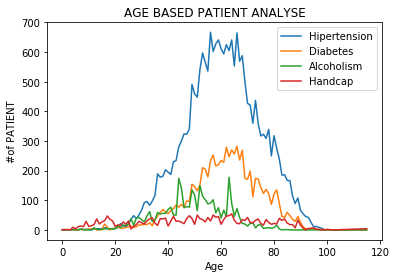

In [16]:

#Group Dataset According to Age 
gender_bar=data_set.groupby(["Age"]).sum()
#Get The Hipertesion,Diabetes and Alcoholism total counts according to Age
gender_patient=gender_bar.iloc[:,3:7]


#plot the analyse
gender_patient_plot=gender_patient.plot()
gender_patient_plot.set_ylabel("#of PATIENT")
gender_patient_plot.set_title('AGE BASED PATIENT ANALYSE')

Hypertension health problem count is much more then the other health problems,for all ages. Graph tell us Hypertension is the major health problem that appointed.

The Analyse tell us, second main problem is Diabetes.Especially between 50-90 people that appointed more than the other ages.

Alcoholism is the third order according to other health problems.Even if not much other problems, We see between 30-60 ages people has Alcholism problem that is appointed.We see that there are not too much people after 70. A

In [43]:
#This function is for proportion based on one variable
def Ratio_of_variable(data_set, variable):
    return np.round(data_set[variable].value_counts()/data_set.shape[0]*100,2)

In [44]:
data_set['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

In [45]:
#Shows the ratio of attendence of appointments.
Ratio_of_variable(data_set,'No-show')

No     79.81
Yes    20.19
Name: No-show, dtype: float64

In [46]:
#Draws pie chart with selected variables
##https://github.com/AmmarJawad/No-show-Medical-Appointments_Kaggle-dataset
def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)

In [47]:
#https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9
#Number of absences at appointments are grouped by 'Gender'


print(data_set.groupby('Gender')['No-show'].value_counts())


Gender  No-show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64


In [48]:
#https://github.com/AmmarJawad/No-show-Medical-Appointments_Kaggle-dataset
#Creates plot bar

def Show_No_Show_bar_plot(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.Apperance, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(stacked = True, figsize=(20,10));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 45, fontsize = 12);
    ax.set_title('ShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2,
                str(height)+'%',
                ha='center',
                va='bottom',
                fontsize = 12)
    return df_by_Group

In [49]:
Ratio_of_variable(data_set,'Gender')

F    65.0
M    35.0
Name: Gender, dtype: float64

Apperance,noshow,show
Gender,,
F,20.31,79.69
M,19.97,80.03


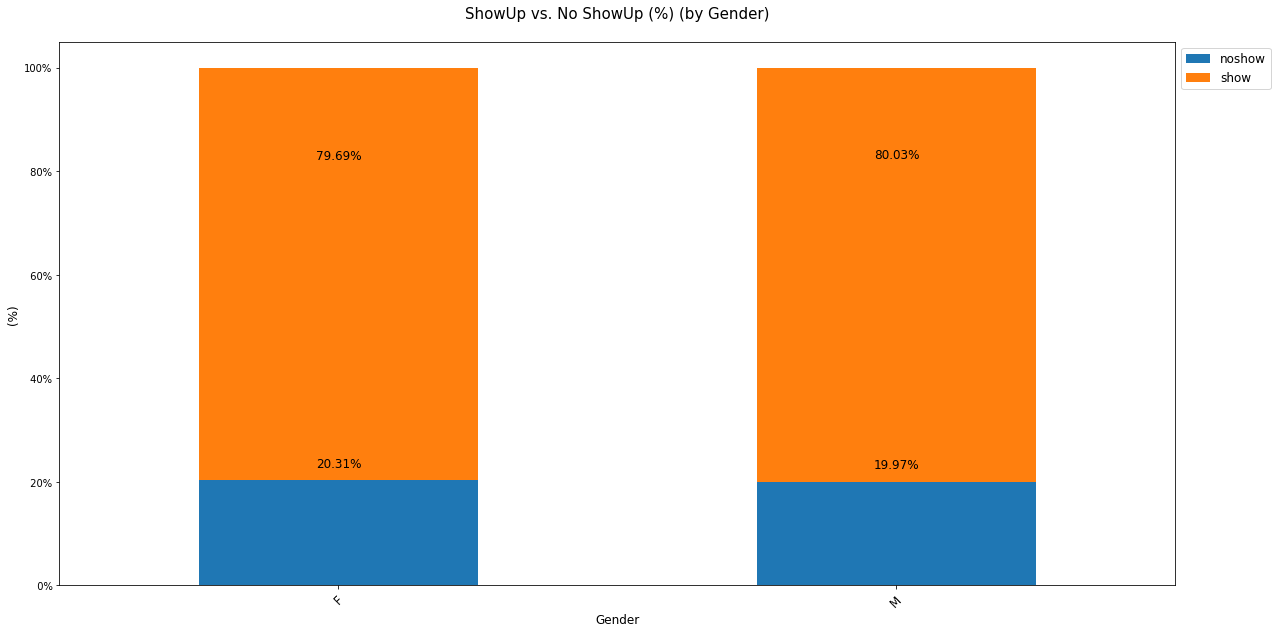

In [50]:
#Shows the apperance on appointment by gender
Show_No_Show_bar_plot(data_set, 'Gender')

__**Based on results on bar plot above:**__

**The Show-up rate of male patients is slightly greater than the show-up rate of female patients.**

0    96.96
1     3.04
Name: Alcoholism, dtype: float64

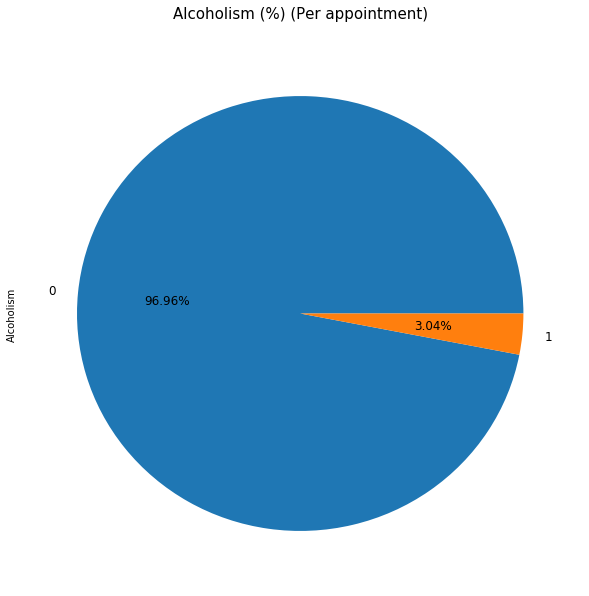

In [51]:
PropByVar(data_set,'Alcoholism')

Looking at the chart above,

we find that the appointment proportion where patients have no alcoholism is 96.96%

## 4-CONCLUSION

Although it is very detail data set, there are some limitations. First of all there are just 4 healt problems in the analyse.Data set could be divided in two or three parts for adults, babies and children.(Most of babies deal with different health problems rather than hipertension).Total lenght of the Dataset 110525 rows but there are  48228 people have health problems.I can not say that effective representation of the population or not.